#### TODO
Cargar todos los resultados. Para cada uno de ellos etiquetarlos con el tipo de dato sintético entrenado
Mostrar los resultados coloreando por el tipo de dato sintético

In [40]:
import pandas as pd
from glob import glob

In [41]:
all_excel_files = glob("../results/ctgan/predictors*.xlsx")

# read all Excel files at once
df = pd.concat(pd.read_excel(excel_file) for excel_file in all_excel_files)

In [42]:
df['type'] = df['model'].apply(lambda x: x.split('_')[0])

In [43]:
metrics = ['type', 'roc_auc', 'f1', 'precision', 'recall', 'accuracy']

Obtener los mejores 10 algoritmos

In [44]:
best_types = df[df['roc_auc'].notnull()].sort_values(['roc_auc', 'accuracy'], ascending=False).groupby('type').head(1).head(5)['type'].tolist()

In [45]:
top_df = (
    df[df["type"].isin(best_types)]
    .dropna(subset=["roc_auc"])  # Eliminar valores nulos en roc_auc
    .sort_values(["roc_auc", "accuracy"], ascending=False)
    .groupby("type")
    .head(10)
)

In [46]:
top_df

,model,score_test,accuracy,balanced_accuracy,f1,f1_macro,f1_micro,roc_auc,average_precision,precision,...,hyperparameters_fit,ag_args_fit,features,compile_time,child_hyperparameters,child_hyperparameters_fit,child_ag_args_fit,ancestors,descendants,type
0,LightGBM_r188_BAG_L1_FULL,0.990000,0.900,0.933333,0.833333,0.880952,0.900,0.990000,0.976923,0.714286,...,{},"{'max_memory_usage_ratio': 1.15, 'max_time_lim...","['clin-frecUsoTele', 'eval-TLP-Tavec-21_I_RL-P...",NaN,"{'learning_rate': 0.033929021353492905, 'extra...",{'num_boost_round': 76},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[],[],LightGBM
0,WeightedEnsemble_L2_FULL,0.990000,0.850,0.900000,0.769231,0.829060,0.850,0.990000,0.976923,0.625000,...,{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","['RandomForest_r15_BAG_L1', 'NeuralNetTorch_r1...",NaN,"{'ensemble_size': 25, 'subsample_size': 1000000}",{'ensemble_size': 8},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","['RandomForest_r15_BAG_L1_FULL', 'CatBoost_r16...",[],WeightedEnsemble
1,LightGBM_r30_BAG_L2_FULL,0.986667,0.875,0.916667,0.800000,0.854545,0.875,0.986667,0.962222,0.666667,...,{},"{'max_memory_usage_ratio': 1.15, 'max_time_lim...","['clin-frecUsoTele', 'eval-TLP-Tavec-21_I_RL-P...",NaN,"{'learning_rate': 0.010534290864227067, 'extra...",{'num_boost_round': 208},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","['LightGBM_r15_BAG_L1_FULL', 'NeuralNetFastAI_...",[],LightGBM
1,LightGBM_r42_BAG_L1_FULL,0.986667,0.950,0.933333,0.900000,0.933333,0.950,0.986667,0.971429,0.900000,...,{},"{'max_memory_usage_ratio': 1.15, 'max_time_lim...","['clin-frecUsoTele', 'eval-TLP-Tavec-21_I_RL-P...",NaN,"{'learning_rate': 0.07856777698860955, 'extra_...",{'num_boost_round': 53},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[],[],LightGBM
2,RandomForest_r166_BAG_L2_FULL,0.981667,0.875,0.916667,0.800000,0.854545,0.875,0.981667,0.951923,0.666667,...,{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","['clin-frecUsoTele', 'eval-TLP-Tavec-21_I_RL-P...",NaN,"{'n_estimators': 300, 'max_leaf_nodes': 42644,...",{'n_estimators': 300},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","['LightGBM_r15_BAG_L1_FULL', 'NeuralNetFastAI_...",[],RandomForest
3,LightGBM_r30_BAG_L1_FULL,0.980000,0.925,0.883333,0.842105,0.896462,0.925,0.980000,0.953247,0.888889,...,{},"{'max_memory_usage_ratio': 1.15, 'max_time_lim...","['clin-frecUsoTele', 'eval-TLP-Tavec-21_I_RL-P...",NaN,"{'learning_rate': 0.010534290864227067, 'extra...",{'num_boost_round': 240},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[],[],LightGBM
4,LightGBM_r96_BAG_L2_FULL,0.980000,0.875,0.916667,0.800000,0.854545,0.875,0.980000,0.953247,0.666667,...,{},"{'max_memory_usage_ratio': 1.15, 'max_time_lim...","['clin-frecUsoTele', 'eval-TLP-Tavec-21_I_RL-P...",NaN,"{'learning_rate': 0.01518660230385841, 'extra_...",{'num_boost_round': 179},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","['LightGBM_r15_BAG_L1_FULL', 'NeuralNetFastAI_...",[],LightGBM
5,NeuralNetFastAI_r160_BAG_L2_FULL,0.980000,0.875,0.916667,0.800000,0.854545,0.875,0.980000,0.935437,0.666667,...,{},"{'max_memory_usage_ratio': 1.15, 'max_time_lim...","['clin-frecUsoTele', 'eval-TLP-Tavec-21_I_RL-P...",NaN,"{'layers': [400, 200, 100], 'emb_drop': 0.3171...","{'epochs': 20, 'best_epoch': 3}","{'max_memory_usage_ratio': 1.0, 'max_time_limi...","['LightGBM_r15_BAG_L1_FULL', 'NeuralNetFastAI_...",[],NeuralNetFastAI
2,LightGBM_r94_BAG_L1_FULL,0.976667,0.900,0.900000,0.818182,0.874608,0.900,0.976667,0.952500,0.750000,...,{},"{'max_memory_usage_ratio': 1.15, 'max_time_lim...","['clin-frecUsoTele', 'eval-TLP-Tavec-21_I_RL-P...",NaN,"{'learning_rate': 0.04034449862560467, 'extra_...",{'num_boost_round': 95},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[],[],LightGBM
6,CatBoost_r137_BAG_L2_FULL,0.976667,0.875,0.916667,0.800000,0.854545,0.875,0.976667,0.937817,0.666667,...,{},"{'max_memory_usage_ratio': 1.15, 'max_time_lim...","['clin-frecUsoTele', 'eval-TLP-Tavec-21_I_RL-P...",NaN,"{'i

C:\Users\jgala\AppData\Local\Temp\ipykernel_20848\1124098847.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


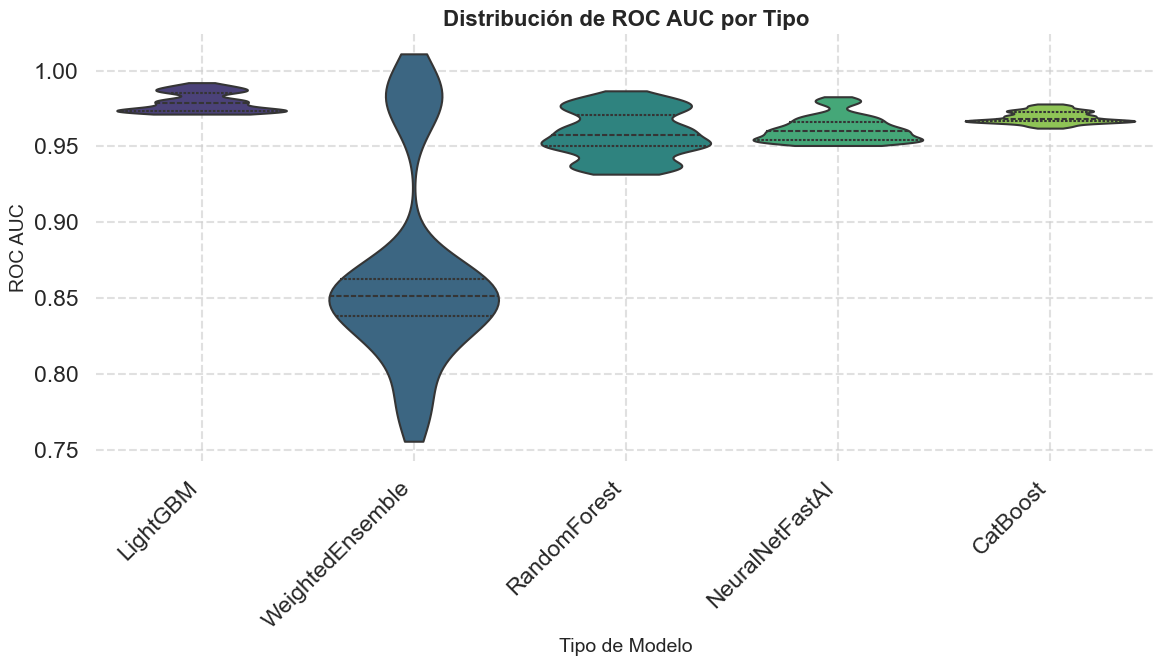

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo científico mejorado
sns.set_theme(style="whitegrid", context="talk", palette="deep")

# Configurar la figura
fig, ax = plt.subplots(figsize=(12, 7))

# Gráfico de violín con mejor visibilidad
sns.violinplot(
    data=top_df, x="type", y="roc_auc", 
    bw_adjust=0.5, cut=1, linewidth=1.5, 
    palette="viridis", inner="quartile"
)

# Personalización de etiquetas y título
ax.set_title("Distribución de ROC AUC por Tipo", fontsize=16, fontweight="bold")
ax.set_xlabel("Tipo de Modelo", fontsize=14)
ax.set_ylabel("ROC AUC", fontsize=14)

# Rotar etiquetas del eje X para evitar cortes
plt.xticks(rotation=45, ha="right")

# Mejorar la visibilidad de los ejes
sns.despine(left=True, bottom=True)
ax.grid(True, linestyle="--", alpha=0.6)

# Ajustar automáticamente los márgenes para evitar superposiciones
plt.tight_layout()

# Mostrar el gráfico
plt.show()


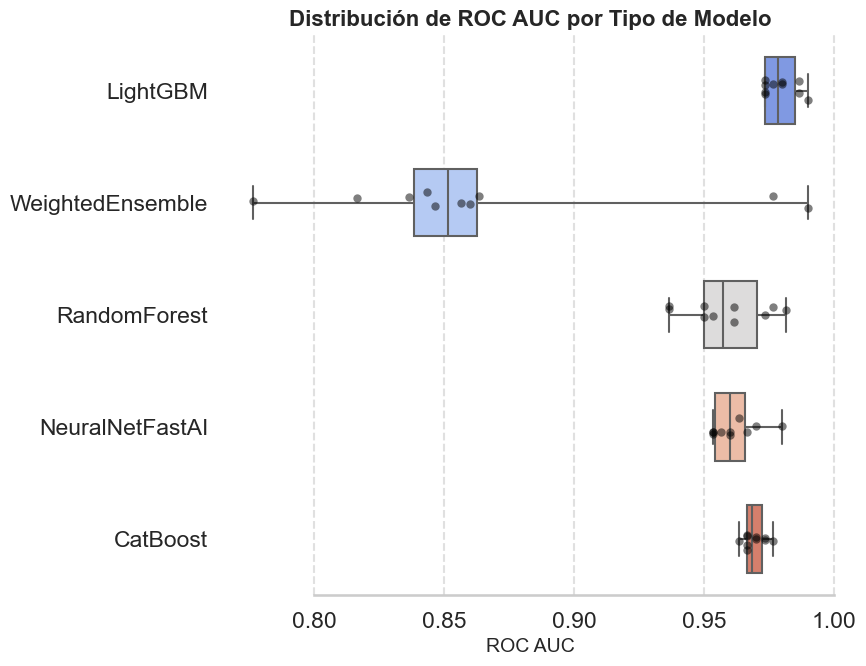

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo mejorado para visualización clara
sns.set_theme(style="whitegrid", context="talk", palette="deep")

# Inicializar la figura
fig, ax = plt.subplots(figsize=(9, 7))

# Gráfico de caja con mejor visibilidad
sns.boxplot(
    data=top_df, x="roc_auc", y="type", hue="type",
    whis=[0, 100], width=0.6, palette="coolwarm", 
    linewidth=1.5, fliersize=0  # Ocultar outliers ya que se mostrarán con stripplot
)

# Agregar puntos individuales para cada observación
sns.stripplot(
    data=top_df, x="roc_auc", y="type", size=6, 
    color="black", alpha=0.5, jitter=True  # Mejor dispersión y visibilidad
)

# Personalización del gráfico
ax.set_title("Distribución de ROC AUC por Tipo de Modelo", fontsize=16, fontweight="bold")
ax.set_xlabel("ROC AUC", fontsize=14)
ax.set_ylabel("")  # Se mantiene vacío para claridad
ax.xaxis.grid(True, linestyle="--", alpha=0.6)  # Líneas de cuadrícula más sutiles

# Ampliar el eje X hasta 1

# Despinar para un diseño más limpio
sns.despine(trim=True, left=True)

# Ajustar automáticamente el diseño para evitar solapamientos
plt.tight_layout()

# Mostrar el gráfico
plt.show()
